# Development examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import heputils
# TODO: heputils.set_style("ATLAS")

# Fix this
import mplhep
plt.style.use(mplhep.style.ATLAS)

In [2]:
with open("example.json") as infile:
    hists = json.load(infile)

In [3]:
hists.keys()
_keys = list(hists.keys())
labels = [r"$t\bar{t}$", r"$W+$jets", "Other", "Signal"]
mass_hists = [(np.array(hists[key]["counts"]), np.array(hists[key]["bins"])) for key in _keys]

In [4]:
colormap = ['darkorange', 'steelblue', 'firebrick', 'purple']

scale_factors = np.ones(len(mass_hists))
scale_factors[-1]=10

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


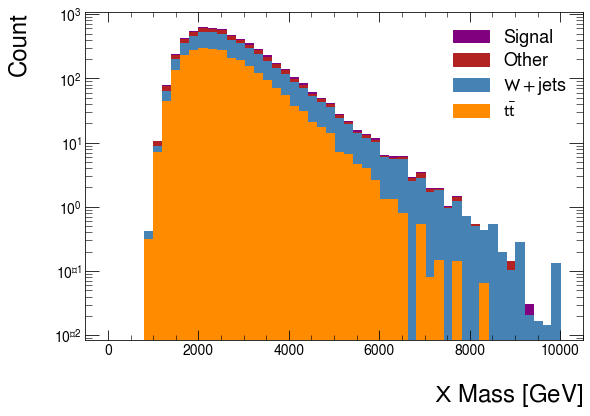

In [5]:
heputils.plot.stack_hist(mass_hists, labels=labels, color=colormap, xlabel=r"$X$ Mass [GeV]", ylabel="Count");

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


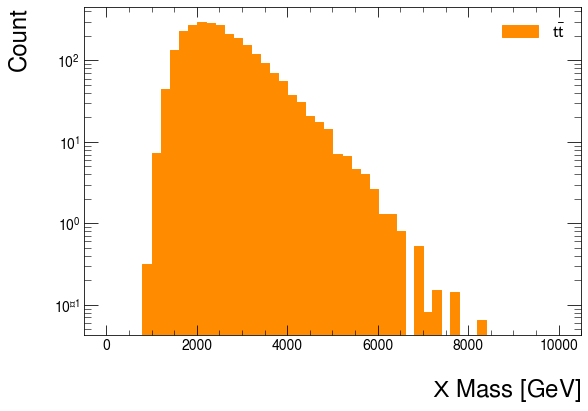

In [6]:
heputils.plot.stack_hist(mass_hists[0], labels=labels, color=colormap, xlabel=r"$X$ Mass [GeV]", ylabel="Count");